Source:https://archive.ics.uci.edu/dataset/502/online+retail+ii

In [ ]:
import pandas as pd

In [ ]:
path = "/content/Online Retail.xlsx"
df = pd.read_excel(path)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:

df['TotalSpent'] = df['Quantity'] * df['UnitPrice']
monetary_df = df.groupby('CustomerID')['TotalSpent'].sum().reset_index()
monetary_df

,CustomerID,TotalSpent
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


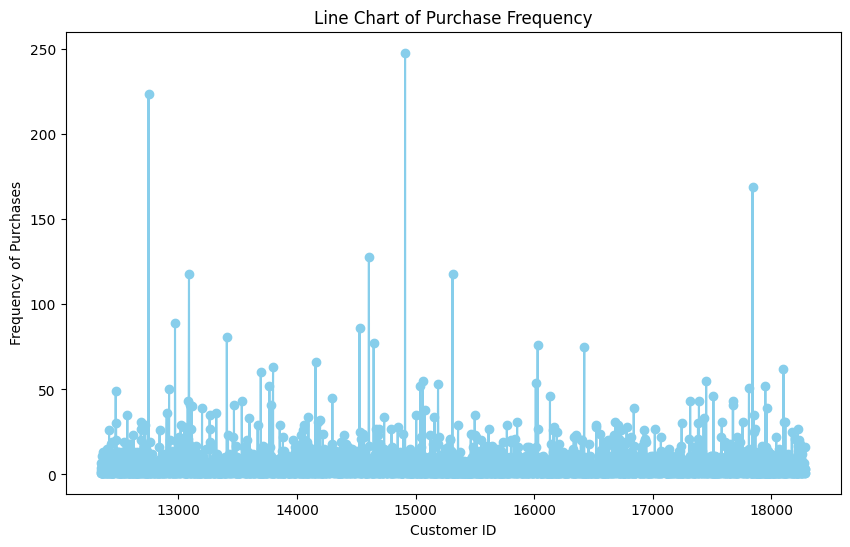

In [ ]:
import matplotlib.pyplot as plt

frequency_df = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency_df.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)
plt.figure(figsize=(10, 6))
plt.plot(frequency_df['CustomerID'], frequency_df['Frequency'], marker='o', linestyle='-', color='skyblue')
plt.title('Line Chart of Purchase Frequency')
plt.xlabel('Customer ID')
plt.ylabel('Frequency of Purchases')
plt.show()
# graph's showing how often each customer makes purchases.

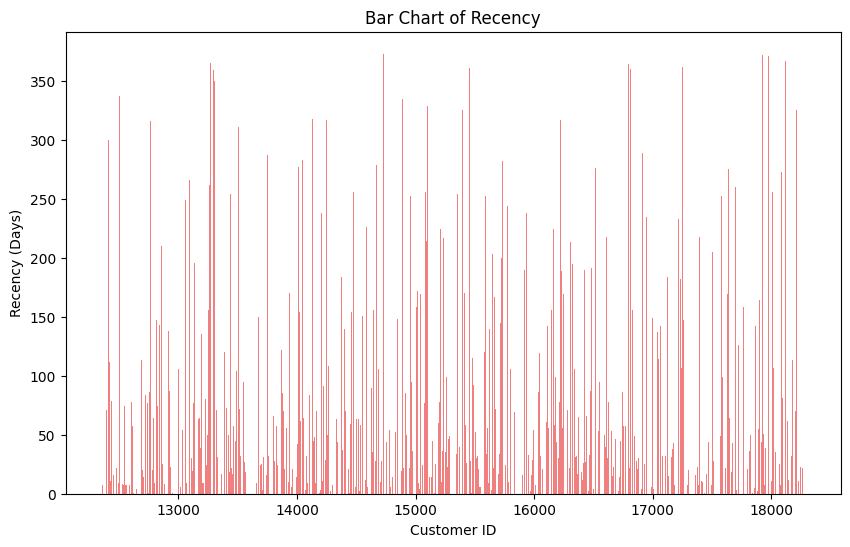

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
max_date = df['InvoiceDate'].max()
recency_df = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency_df['Recency'] = (max_date - recency_df['InvoiceDate']).dt.days

recency_df = recency_df.sort_values(by='Recency', ascending=True)

plt.figure(figsize=(10, 6))
plt.bar(recency_df['CustomerID'], recency_df['Recency'], color='lightcoral')
plt.title('Bar Chart of Recency')
plt.xlabel('Customer ID')
plt.ylabel('Recency (Days)')
plt.show()
